In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pandas as pd

# Create Train Dataset

In [2]:
data_dir=r"C:\Users\speed\Documents\Face Mask Recognition TensorFlow Object Detection API\data"
classes=[i for i in os.listdir(data_dir)]
train=[]
for i in classes:
    current_class=classes.index(i)
    current_path=os.path.join(data_dir,i)
    for j in os.listdir(current_path):
        img=cv2.imread(os.path.join(data_dir,i,j),cv2.IMREAD_GRAYSCALE)
        try:
            img=cv2.resize(img,(70,70))
        except:
            continue
        train.append([img,current_class])
random.shuffle(train)
x=[]
y=[]
for i,j in train:
    x.append(i)
    y.append(j)
x=np.array(x)
y=np.array(y)

# Initialize TensorBoard

In [3]:
tsb=tf.keras.callbacks.TensorBoard(log_dir="logs")

# Create Model

In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(70,70,1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])

# Get Summary Of Model

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 68, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0

# Compile The Model

In [6]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

# Train The Model

In [7]:
history=model.fit(x,y,epochs=10,validation_split=0.1,callbacks=[tsb])

Epoch 1/10
563/563 [==============================] - 110s 194ms/step - loss: 0.4115 - accuracy: 0.9812 - val_loss: 2.4593e-04 - val_accuracy: 1.0000
Epoch 2/10
563/563 [==============================] - 110s 196ms/step - loss: 0.0497 - accuracy: 0.9884 - val_loss: 7.8330e-05 - val_accuracy: 1.0000
Epoch 3/10
563/563 [==============================] - 110s 196ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 8.3411e-04 - val_accuracy: 0.9995
Epoch 4/10
563/563 [==============================] - 119s 212ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 7.0555e-05 - val_accuracy: 1.0000
Epoch 5/10
563/563 [==============================] - 129s 229ms/step - loss: 7.3002e-04 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 6/10
563/563 [==============================] - 131s 232ms/step - loss: 5.7889e-07 - accuracy: 1.0000 - val_loss: 7.3856e-04 - val_accuracy: 0.9995
Epoch 7/10
563/563 [==============================] - 116s 207ms/step - loss: 5.1296e-07 - accur

# Accuracy Graph

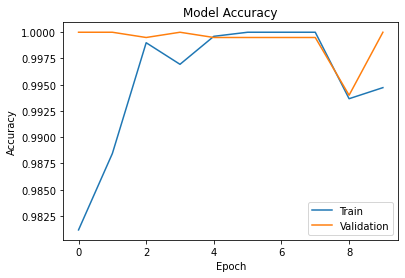

In [8]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Loss Graph

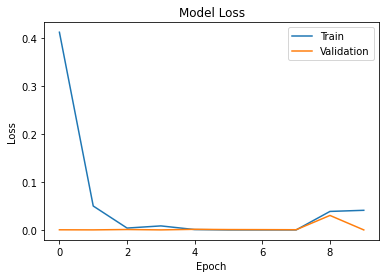

In [9]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Validation"],loc="best")

# Predict On Images

In [10]:
def prepare(filepath):
    img=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(70,70))
    return img.reshape(-1,70,70,1)

## Without Mask

1/1 [==============================] - 0s 107ms/step
new_without_mask
1/1 [==============================] - 0s 16ms/step


array([[0.60761935, 0.39238063]], dtype=float32)

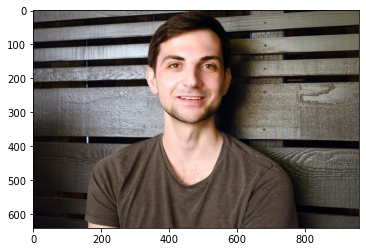

In [11]:
print(classes[int(np.argmax(model.predict(prepare(r"C:\Users\speed\Downloads\images.jpg"))))])
plt.imshow(plt.imread(r"C:\Users\speed\Downloads\images.jpg"))
model.predict(prepare(r"C:\Users\speed\Downloads\images.jpg"))

## With Mask

1/1 [==============================] - 0s 18ms/step
new_with_mask
1/1 [==============================] - 0s 15ms/step


array([[3.6985127e-21, 1.0000000e+00]], dtype=float32)

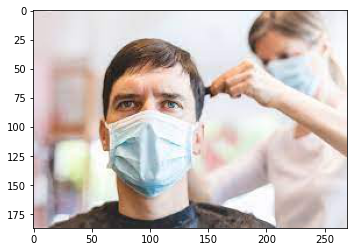

In [12]:
print(classes[int(np.argmax(model.predict(prepare(r"C:\Users\speed\Downloads\images2.jpg"))))])
plt.imshow(plt.imread(r"C:\Users\speed\Downloads\images2.jpg"))
model.predict(prepare(r"C:\Users\speed\Downloads\images2.jpg"))

# Save The Model

In [13]:
model.save("face_mask_detection.h5")

# Convert Model To TFLite Model For Edge Devices

In [14]:
tf_lite_converter=tf.lite.TFLiteConverter.from_keras_model(model)
with open("face_mask_detection.tflite","wb")as f:
    f.write(tf_lite_converter.convert())

INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpm5epqy6g\assets


INFO:tensorflow:Assets written to: C:\Users\speed\AppData\Local\Temp\tmpm5epqy6g\assets
